# The numpy.random Package
***

### 1. Purpose of the package
***
NumPy is a high-performance multidimensional array library. A NumPy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The Python core library provides lists, which is the Python equivalent of an array, but is resizeable and can contain elements of different types. NumPy data structures perform better in terms of size, performance and functionality. (https://webcourses.ucf.edu/courses/1249560/pages/python-lists-vs-numpy-arrays-what-is-the-difference)

numpy.random is a subpackage of NumPy which offers a suite of functions based on pseudorandom number generation. (https://www.datacamp.com/community/tutorials/numpy-random) A random number does not mean generating a different number every time, but rather something that cannot be predicted logically. If there is a program to generate a random number, it can be predicted, and therefore it is not truly random. Random numbers generated through a generation algorithm are referred to as pseudorandom. (https://www.w3schools.com/python/numpy_random.asp) Pseudorandomness is a sample of numbers that appear random, but were generated using a deterministic process. The numbers are generated in a sequence that is deterministic and seeded with an initial number. The value of this seed does not matter. What does matter is that the same seeding of the process will result in the same sequence of random numbers. (
https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/)

The first step is to import the NumPy library as well as the other libraries required in the subsequent sections.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The function below constructs a new Generator. It has one parameter which creates a seed to initialise the BitGenerator.

In [4]:
rng = np.random.default_rng(123)
print(rng)

Generator(PCG64)


In [ ]:
a = np.array([1,3,5])
b = np.array([1,2,3])
print(a * b)
# would get an error if using lists

In [ ]:
c = np.array([[9.0,8.0,7.0],[6.0,5.0,4.0]]) #2D array of floats - list within a list
print(c)

In [ ]:
# Random decimal numbers
np.random.rand(4,2,3)

In [ ]:
# Random interger values
np.random.randint(4, 7, size=(3,3))

The following sections will explain the use of the "Simple random data" and "Permutations" functions, explain the use and purpose of eight "Distributions" functions, and explain the use of seeds in generating pseudorandom numbers.

<br>

### 2. Simple random data functions
***
There are four simple random data functions in the numpy.random package. These are:

1. integers()
2. random()
3. choice()
4. bytes()

#### 2.1. integers(low[, high, size, dtype, endpoint])

This function returns random integers from *low* (inclusive) to *high* (exclusive), or if ```endpoint=True```, *low* (inclusive) to *high* (inclusive). This replaces the RandomState.randint and RandomState.random_integers functions in the previous API documentation. [Ref: numpy.random.Generator.integers] The function below returns an array comprising 15 intergers between two and 12. By setting ```endpoint=True```, the default setting is overwritten and the number 12 is now inclusive in the output.

In [3]:
rng = np.random.default_rng()
rng.integers(2, 12, size=15, endpoint=True)

array([ 4,  8, 12,  5,  2, 10,  4,  8, 12,  3, 10,  4,  9,  8, 11],
      dtype=int64)

If no value is given for *high*, this results in an array ranging from 0 to the *low* value as shown below. In this instance, ```endpoint=False``` is the default, therefore the *low* value of five is excluded.

In [6]:
rng = np.random.default_rng()
rng.integers(5, size=15)

array([4, 0, 0, 0, 2, 4, 3, 3, 4, 2, 4, 4, 1, 0, 2], dtype=int64)

A tuple of integers can also be passed to the *size* parameter. In the example below, an array of 50 blocks comprising 20 rows of 40 integers is returned. As ```endpoint=True```, the *low* value of 30 is included. The results are from the "discrete uniform" distribution, which is also known as the "equally likely outcomes" distribution. [Ref: Discrete uniform distribution] It is clear from the plot below that the probability density is almost equal for each integer. 

In [44]:
rng = np.random.default_rng()
a = rng.integers(30, size=(50,20,40), endpoint=True)
print(a)

[[[28 29  1 ... 12 13 15]
  [ 7 15 11 ... 22  5  0]
  [17 30 18 ...  5 19  2]
  ...
  [11  4 24 ... 13 18 27]
  [11 29 13 ... 25 23 17]
  [20 15 23 ... 14  9 24]]

 [[21 30 27 ...  0 17 26]
  [ 6 26 19 ... 11 11 12]
  [ 4  1  7 ... 10 24  2]
  ...
  [19 28 15 ... 12  3 22]
  [26  1 20 ... 22 26  4]
  [23 12 18 ... 16 10  9]]

 [[25  4  8 ... 28 15 29]
  [29 18 10 ... 21  1  0]
  [15  0 13 ... 14  6 15]
  ...
  [11 16 29 ...  0 28  6]
  [21 15 26 ... 19 16 23]
  [22  3 12 ... 15 16  9]]

 ...

 [[10 11  0 ... 20  9 13]
  [17 25 25 ...  5  8 29]
  [29 23 14 ... 10 27 26]
  ...
  [29 21 27 ... 14 13 12]
  [15 12  7 ... 21  1 24]
  [ 6 29  1 ... 23 14 12]]

 [[27  5  3 ... 11 17  2]
  [13 25  1 ... 30 22  1]
  [ 7 16 14 ...  6 29 22]
  ...
  [26 23  6 ... 15 21 10]
  [16 24 21 ... 11 22  0]
  [22 30 19 ...  0  6 20]]

 [[14 21 19 ...  6  2 18]
  [ 9 27 15 ... 11 25 12]
  [20 13  0 ... 30 22 28]
  ...
  [ 8 11  2 ... 17 19 22]
  [30 29 18 ... 18 20 30]
  [ 4  5 17 ... 15 14 21]]]


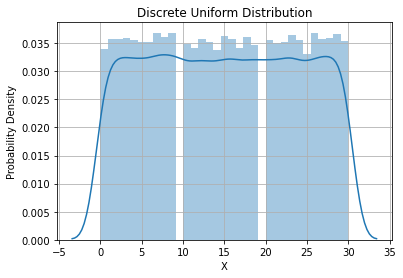

In [45]:
sns.distplot(a)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Discrete Uniform Distribution")
plt.grid()

#### 2.2 random([size, dtype, out])

This function returns random floats in the half-open interval [0.0, 1.0). A half-open (or half-closed) interval is an interval in which one endpoint is included, but not the other. It is denoted [a, b) or (a, b]. [Ref: Half-closed interval][Ref: Interval] In this instance, $0.0<=x<1.0$. The function below returns an array comprising three blocks of four rows of five floats between 0.0 (inclusive) and 1.0 (exclusive).

In [ ]:
rng = np.random.default_rng()
rng.random((3,4,5))

The function below returns an array of 500 floats between 0.0 and 1.0. The results are from the "continuous uniform" distribution over the stated interval, and therefore the mean of these numbers is approximpately 0.5. [Ref: numpy.random.Generator.random][Ref: Generating random numbers in NumPy] 

In [50]:
rng = np.random.default_rng()
b = rng.random(500)
print(b)

[0.58890168 0.43706112 0.62790067 0.92998401 0.67903917 0.07343127
 0.35540249 0.17837866 0.87767482 0.88723805 0.4038557  0.57122321
 0.88209633 0.25383485 0.28544395 0.21241608 0.6226902  0.09008799
 0.82661779 0.90557287 0.09279736 0.99602115 0.9276617  0.87345425
 0.06166761 0.6006014  0.37118293 0.65685162 0.02743935 0.18110977
 0.88626555 0.65113345 0.98814036 0.30274407 0.97496407 0.72236315
 0.94277812 0.98126792 0.93782019 0.0033236  0.63165143 0.09942728
 0.67376024 0.94026129 0.14755416 0.21936559 0.21486755 0.33650821
 0.36036867 0.27393609 0.03483608 0.89806996 0.33629056 0.26837959
 0.57258836 0.54050432 0.77202157 0.61345916 0.96021035 0.87120622
 0.80235602 0.83001064 0.72787716 0.72747976 0.53035371 0.04282719
 0.90009491 0.3168006  0.79821331 0.91022711 0.29338513 0.89483503
 0.03669776 0.7124943  0.40694178 0.30045755 0.98945083 0.56984
 0.16293178 0.20851989 0.28796694 0.25072982 0.65739569 0.87624241
 0.87651716 0.90767403 0.58131444 0.35637723 0.61041273 0.4677278

The ```numpy.mean()``` function can be used to get the mean of the array, which will be approximately 0.5. [Ref: numpy.mean] Graphically, the probability density function is portrayed as a rectangle as per the plot below. [Ref: Continuous uniform distribution]

In [51]:
np.mean(b)

0.4945141294187257

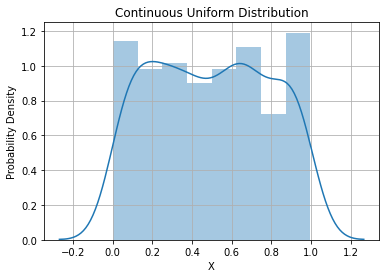

In [52]:
sns.distplot(b)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Continuous Uniform Distribution")
plt.grid()

#### 2.3. choice(a[, size, replace, p, axis, shuffle])

This function generates a random sample from a given 1-D array. [Ref: numpy.random.Generator.choice] The function below returns an array comprising four intergers between 1 and 10 (exclusive). If an integer is given, a random integer is returned from ```numpy.arange(a)```. The subsequent example returns a value between 0 (inclusive) and 10 (exclusive) as values are generated within the half open interval [start, stop). [Ref: numpy.arange]

In [53]:
rng.choice(10, 4)

array([3, 2, 4, 6], dtype=int64)

In [79]:
rng.choice(10)

7

The function can also be used to select a random item from a list as per below. [Ref: Random choice]

In [ ]:
numberList = [111, 222, 333, 444, 555]
print("Random item from list is: ", rng.choice(numberList))

A tuple of integers can also be passed to the *size* parameter. In the example below, an array of three blocks comprising two rows of three integers is returned. The values are between 0 (inclusive) and 18 (exclusive). By setting ```replace=False```, no integer is repeated in the output. An error would occur if the input was less than 18 in this case, as there would not be enough unique integers. [Ref: Replacement]

In [101]:
c = rng.choice(180, size=[3,2,3], replace=False)
print(c)

[[[162 137 117]
  [ 57  50 151]]

 [[104  16 112]
  [119  92 126]]

 [[118 149  14]
  [ 99 176  39]]]


#### 2.4. bytes(length)

This function returns random bytes as a string. [Ref: numpy.random.Generator.bytes] The function below returns five bytes. The subsequent example outputs 10 rows of bytes increasing in length by one byte with each iteration. [Ref: Bytes]

In [103]:
rng.bytes(5)

b'\xbfb\xea\xd1d'

In [105]:
for length in range(10):
    print(length, ": ", rng.bytes(length))

0 :  b''
1 :  b'\xea'
2 :  b'\x18>'
3 :  b'9E\x8c'
4 :  b'\xa2\\\x8f\xcd'
5 :  b'\xa7\xdbi\xd6\x11'
6 :  b'\x92\xac\x0e\xb4\xf5\xb4'
7 :  b'\xd3\xac\x91\x06\xc4\xa8\x9f'
8 :  b'\xc2\xb2\xcc\xdb\x1d\x06\xd3H'
9 :  b'\x93\xccm\x10\xb9\xbaa2m'


<br>

### 3 Permutations functions
***
There are two permutation functions in the numpy.random package. These are:

1. shuffle()
2. permutation()

#### 3.1. shuffle(x[, axis])

This function modifies a sequence in-place by shuffling its contents. [Ref: numpy.random.Generator.shuffle] The function below takes a list of sequential integers as input and reorganises the items.  

In [106]:
shuffle_lst = [1, 2, 3, 4, 5]
rng.shuffle(shuffle_lst)
print(shuffle_lst)

[5, 2, 4, 1, 3]


The function below returns an array comprising three blocks of 3 rows of two floats between 0.0 and 1.0. The subsequent code shuffles the order of the blocks while the order of the rows and floats within remain unchanged.

In [110]:
shuffle_array = rng.random((3,3,2))
print(shuffle_array)

[[[0.06696766 0.44431314]
  [0.27654416 0.56338031]
  [0.03695844 0.40385019]]

 [[0.59071613 0.95730592]
  [0.26637989 0.16025154]
  [0.84804636 0.97094512]]

 [[0.75228094 0.11148922]
  [0.52117315 0.76736431]
  [0.43884985 0.95624327]]]


In [108]:
rng.shuffle(shuffle_array)
print(shuffle_array)

[[[0.02802123 0.64934032]
  [0.02719109 0.5356109 ]
  [0.05938386 0.76554618]]

 [[0.74912185 0.32804195]
  [0.65296979 0.58155002]
  [0.21310307 0.82127669]]

 [[0.76641153 0.12645713]
  [0.55707605 0.74439452]
  [0.49937979 0.59768471]]]


#### 3.2. permutation(x[, axis])

This function randomly permutes a sequence, or returns a permuted range. The difference between this and the shuffle() function is that permutation() returns a re-arranged array while leaving the original array unchanged. [Ref: Random permutation]

In [3]:
perm_array = [1, 2, 3, 4 , 5]
print(rng.permutation(perm_array))
print(perm_array)

[1 5 2 3 4]
[1, 2, 3, 4, 5]


If passed an integer, the function will return a shuffled range as shown below. [Ref: Shuffle vs Permute]

In [9]:
#rng.shuffle(10)
rng.permutation(10)

array([7, 4, 0, 2, 1, 5, 6, 8, 3, 9])

<br>

### 4. Distributions functions
***
There are 35 distribution functions in the numpy.random package. Eight of these are:

1. chisquare()
2. exponential()
3. geometric()
4. gumbel()
5. lognormal()
6. normal()
7. rayleigh()
8. triangular()

#### 4.1. chisquare(df[, size])

This function draws samples from a chi-square distribution, and helps in understanding the relationship between two categorical variables. It helps to compare what is observed with what is expected, and is used as a basis to verify the hypothesis. [Ref: Chi-squared test] It has two parameters: *df* (degree of freedom) and *size* (the shape of the returned array). [Ref: Chi-square distribution] The degree of freedom must be greater than zero and is broadly defined as the number of "observations" in the data that are free to vary when estimating statistical parameters. [Ref: What are degrees of freedom in statistics?]

The test can be expressed as:

$x^{2} = \sum\frac{(O-E)^{2}}{E}$

where *O* is the number of observed events and *E* is the number of expected events under the null hypothesis.

The function below outputs three arrays of 30 blocks of 60 values, with different degrees of freedom.

In [30]:
ax = rng.chisquare(df=20, size=(30,60))
ay = rng.chisquare(df=40, size=(30,60))
az = rng.chisquare(df=60, size=(30,60))
print(a)

[[19.64340646 21.2122207  18.75861033 ... 28.94176795 17.59226076
  19.3499609 ]
 [18.34597927 15.15167391  8.28461852 ... 16.55328155 19.51572534
  15.41033799]
 [15.90916635 27.43242154 24.38504828 ... 22.91103259 16.41426608
  12.46776009]
 ...
 [16.67801206 19.00465793 22.81709649 ... 19.86228433 20.51236738
  17.12211739]
 [17.1029257  19.30015244 35.83933737 ... 26.7123818  28.23499671
  26.68200685]
 [20.43765324 14.90266964 18.14040986 ... 27.59463569 10.96956074
  13.38505327]]


The plot below shows how the probability density peaks at approximately the *df* value on the x-axis of each distribution. [Ref: Comparing frequencies] The distribution is also wider along the x-axis as the degree of freedom increases.

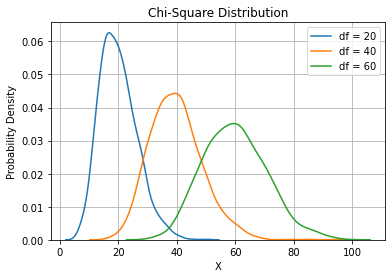

In [36]:
sns.distplot(ax, label="df = 20", hist=False)
sns.distplot(ay, label="df = 40", hist=False)
sns.distplot(az, label="df = 60", hist=False)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Chi-Square Distribution")
plt.grid()

#### 4.2. exponential([scale, size])

    This function draws samples from an exponential distribution. [Ref: Random exponential]

In [84]:
b = rng.exponential(scale=2, size=(10, 20))
print(b)

[[8.15318186e-01 2.17852033e+00 9.11401766e-01 5.56901731e-01
  1.24661650e+00 1.41339340e+00 5.54948246e-01 4.74803756e+00
  8.24841075e-02 1.50438073e-01 2.03823095e-01 9.37830846e-01
  3.61220149e-03 2.38977038e-01 1.37119706e+00 1.41940761e+00
  7.04077600e-01 2.91614281e+00 1.00862484e+00 1.94187910e+00]
 [9.23572868e+00 7.43325146e-01 1.75845132e+00 3.52450398e+00
  1.47526643e-02 3.81049639e+00 1.95389009e+00 2.62460096e+00
  1.76521464e+00 1.88799481e+00 1.74642196e-01 7.34195378e-02
  4.77713497e-01 6.80417742e-01 1.74339144e+00 3.22557100e-01
  9.39871952e-01 4.21565088e+00 1.47919749e+00 1.42153759e+00]
 [1.18366468e+00 1.69531120e+00 8.24160437e-01 8.91908119e-01
  2.84971005e-01 2.29852245e+00 4.72524536e+00 1.32722921e-02
  3.41378940e-01 1.81878740e+00 2.29406235e-01 9.30581719e-02
  1.48504903e+00 1.89497226e+00 8.59407303e-01 6.77749513e-01
  9.74330986e-01 8.26556744e-01 2.20675137e+00 4.87601530e+00]
 [1.89622873e-01 1.33355723e+00 3.93745062e+00 1.13731346e+00
  2.6

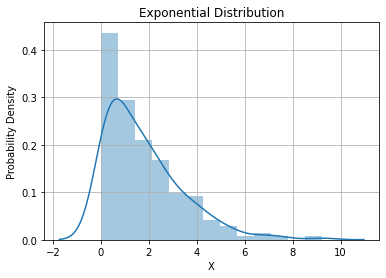

In [85]:
sns.distplot(b)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Exponential Distribution")
plt.grid()

#### 4.3. geometric(p[, size])

This function draws samples from the geometric distribution. A Bernoulli trial is a random experiment with exactly two possible outcomes, "success" and "failure", in which the probability of success is the same every time the experiment is conducted. (https://en.wikipedia.org/wiki/Bernoulli_trial) The geometric distribution models the number of trials that must be run in order to achieve success. 

In [80]:
c = rng.geometric(p=0.25, size=1000)
print(c)

[ 1  1  6  1  6 10  5  4  1  7  5  1  7  2  8  5  3  3  3 12  1  5  7  1
  9  3  1  1  2  2  1  1  2  1  4  7  1  3  3  2  2  1 12  2 10  3  2  4
  4  5  2  2 11  1  2 13  5  5  5  1  2  2  2  2  1  1  5  3  3  2  4  1
  4  2  2  3  3  6  2  1  5  5  2  9 11  1  2  8  9  7  7  5  4  5  3  1
  5  1  1  1  2  4  3  3  3  2  5  2  7 11  1  5  2  3  2  6  8  3  1  9
  7  2 12  1 19  3  3  1  2  1  3  5  2  9  5  2  7  1 12  3  3  2  3  4
  1  5  1  8  1  4  8  1  2  1  8  3  2  7  5  1  1  4  1  6  1  7  1  8
  1  1  4 10  2  4  2  1  3  2  4  2 13  3  1  2  4  4  1  1  1  3  4 13
  1  8  3  7  8  2  4  5  5  4  3  1  2  2  2  5  4  4 15  6  1  1  2  8
  5  1  1  1  3 22  1  3  2  3  5  2  2  3  2 10  1  5  7  1  5  2  1 10
  6 11  3  2  3  4  2  1  4  3  2  5  2  1  5  6  2  9  2  3  2  7  9  1
  1  2  3 11  1  9  3  2  4  6 10 22  6  2  2  6  4  9  8  6  2  1  2  1
  4  4  9  1 11  1  4  2  1 11  1  3  3  3  1  3  4  1  1  1  1  8  1  7
  1  2  2  6  4  3  4  3  3 11  5  1 10  5  2  7  5

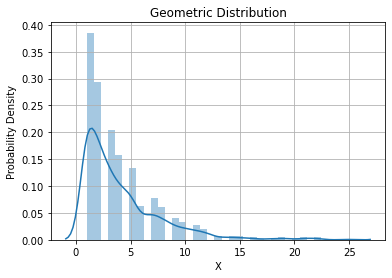

In [81]:
sns.distplot(c)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Geometric Distribution")
plt.grid()

#### 4.4. normal([loc, scale, size])

This function draws samples from a normal (Gaussian) distribution. It is one of the most important distributions and fits the probability distribution of many events, e.g. IQ scores, heartbeat etc.

It has three parameters:
loc - (Mean) where the peak of the bell exists
scale - (Standard Deviation) how flat the graph distribution should be.
size - the shape of the returned array (https://www.w3schools.com/python/numpy_random_normal.asp)

(http://justinbois.github.io/bootcamp/2020/lessons/l23_random_number_generation.html)

In [76]:
d = rng.normal(loc=1, scale=2, size=(10, 30))
print(d)

[[ 0.55468908  1.43251178 -1.33076119  1.36215881 -3.78965089  0.39759323
   1.80591065  2.30336345  3.96118426  3.03224313  0.10984962  2.56745879
  -1.6224874   0.59541561 -0.60000365 -2.32487072  3.22345469 -0.50441103
   0.52914213  0.02911648 -0.612583   -2.52924409  0.96964858 -2.3943326
   2.84511811  0.28675306  1.80689171  2.52888335  1.21394869 -1.17329859]
 [ 3.80938722 -1.47915599  1.858122   -1.65547175 -1.79838854  2.46381548
   2.42366742  4.91672932  0.34144067  3.42665376  0.462189    2.31604047
   3.55961898  3.16478776  1.0175079  -1.215181   -2.52513929  1.55061384
   1.38006952  2.75326204  0.83587268  1.24846727  0.82950517  0.73196531
   2.07090951 -0.34546846  2.10989827  2.44683569  1.13537209  2.40374406]
 [ 3.58127114  2.64074184  2.91737913  1.77157995 -0.59828541  1.59841917
   1.83171642 -1.65012569  0.87957421 -0.11057486  2.35785613  2.73482709
   4.28820228  1.99622068  3.50669842  1.46941508  0.20647365  0.15931798
   3.29170727  0.3658148  -1.49871686

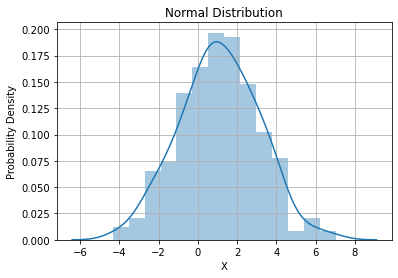

In [77]:
sns.distplot(d)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Normal Distribution")
plt.grid()

#### 4.5. rayleigh([scale, size])

This function draws samples from a Rayleigh distribution. Rayleigh distribution is used in signal processing. It has two parameters, scale and size. (https://www.w3schools.com/python/numpy_random_rayleigh.asp)

In [74]:
e = rng.rayleigh(scale=2, size=(10, 30))
print(e)

[[0.60640743 2.63939169 2.09831894 3.78544747 0.49321085 2.35014155
  2.32995704 3.14858061 5.73271202 4.45499562 0.18515414 2.14235004
  4.12824531 3.47242273 5.47501433 3.45179679 2.57896863 2.51010479
  3.87091651 0.95336762 3.8906272  4.62375656 2.75812651 2.82331239
  2.3759845  2.25522525 3.78589307 3.82129744 4.50383318 1.99536033]
 [4.26028833 1.43699797 3.03158112 3.93427537 0.76051856 1.26710951
  2.33359389 2.75695523 3.4559169  3.99260646 2.28839411 4.32008831
  1.34019722 2.09526259 2.8226578  1.8421307  1.45619777 1.12939221
  2.3510659  0.518523   2.26924104 3.041043   2.28939698 0.77427903
  3.6216678  2.05738319 0.36199213 1.937421   3.96872191 1.9299716 ]
 [2.46794578 2.23733754 2.4298806  0.97537792 0.62937202 2.41345878
  1.65572083 2.66788014 1.92819436 1.94185656 2.36382806 1.56601244
  1.39524882 2.67672848 1.73465827 1.92091714 3.85751195 2.94798729
  1.69156335 2.68421841 1.02505564 2.68265379 1.98252753 0.64738467
  2.66212845 2.36118637 0.22397955 5.47668405 

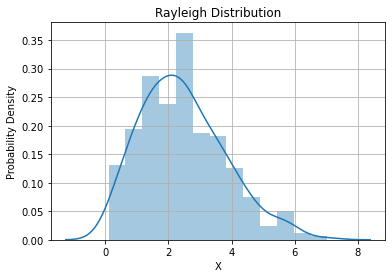

In [75]:
sns.distplot(e)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Rayleigh Distribution")
plt.grid()

#### 4.6. standard_t(df[, size])

This function draws samples from a standard Student's t distribution with *df* degrees of freedom.

In [94]:
f = rng.standard_t(5, 100)
print(f)

[ 0.21062096  2.86664934 -0.94290953  0.217472    0.51017444  0.39778478
 -0.05197084 -0.40382595 -0.4491064   0.03088832  0.56057438 -1.90456833
  1.84030347 -1.49226497 -1.70638091 -1.68748984 -2.69484458 -0.16336133
 -0.20628418 -2.35475742  1.52529692 -0.46409097 -1.19595878  3.43247508
  0.73542349 -0.47426659  1.31526168 -1.16164271  0.74261141 -0.30442767
 -1.32005904  0.81253156  0.84855256  0.49984809 -4.74614444 -0.09683229
  0.67854023 -1.76871266 -0.9828003   1.21593904  0.17399339  0.34416074
 -1.60813831  0.25283225  0.3500952  -1.95760093 -1.4399637   0.60196573
 -0.17280746 -1.16588522 -0.54286508  0.48715542 -2.37844809  1.10131294
  0.22018918 -0.68373908 -3.15763824 -4.76007197 -1.7521475   0.49369329
 -0.19742248 -0.43090237  0.75802907 -0.85390384  3.13005509 -0.07789371
 -2.04045031  1.05135707 -1.98091097  0.6165362   0.28147175 -0.03325784
  1.6377296   0.81260414  0.28970147  3.48708824 -1.86321958  0.17674195
  1.72314947  0.13368142  2.00938267 -0.45663299  2

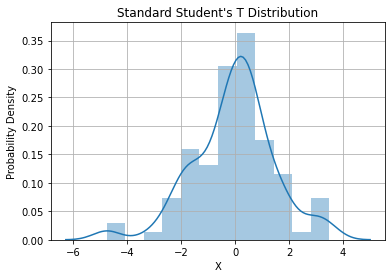

In [95]:
sns.distplot(f)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Standard Student's T Distribution")
plt.grid()

#### 4.7. triangular(left, mode, right[, size])

This function draws samples from the triangular distribution over the interval ```[left, right]```. The function returns a random floating number between the two specified numbers, but a third parameter (the mode) can also be specified.

In [102]:
g = rng.standard_t(20, 30)
print(g)

[-0.05956209 -0.33476442 -1.61667238 -0.76569455 -0.34149623  1.52317369
 -0.3967845   0.30205523  1.11407562  1.09731059 -1.87297602 -0.31656637
  0.2915122   0.66231567  0.98587292  0.02017136 -1.43388022 -2.38962964
  1.52803594 -0.57772913 -0.28478566 -1.54291697 -0.24169722 -0.31158645
  0.3856539   1.12995913  0.97796633  0.47277784  0.99951918  0.84416417]


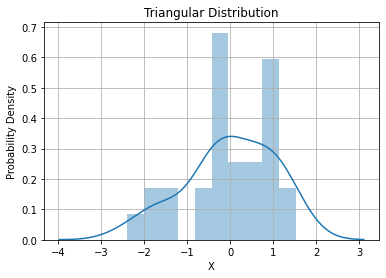

In [107]:
sns.distplot(g, bins=10)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Triangular Distribution")
plt.grid()

#### 4.8. uniform([low, high, size])

This function draws samples from a uniform distribution. It returns a random floating number between two specified numbers (both inclusive). (https://www.w3schools.com/python/ref_random_uniform.asp)

In [108]:
h = rng.standard_t(20, 30)
print(h)

[-0.13538645  1.2146827  -0.81700319 -1.26676722 -2.23985864  0.24373019
  0.44868824 -1.16765719 -0.25779134 -1.37427893  0.25175943 -2.43123355
  0.2154263   1.43616877 -1.24097035 -0.54735337 -0.29502861  1.81214121
 -0.06559902  0.49638679  0.50600207  1.27457409  0.06281232 -0.91914383
 -2.52125779 -0.08443922  1.16058705  0.90289988 -0.97367396  0.55229522]


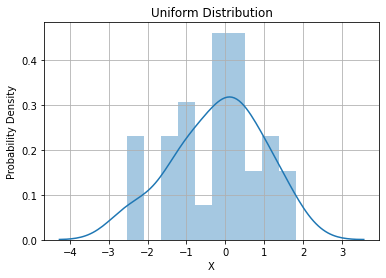

In [109]:
sns.distplot(h, bins=10)
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Uniform Distribution")
plt.grid()

<br>

### 5. Seeds
***
There are four random generator functions in the numpy.random package. These are:

1. RandomState
2. seed()
3. get_state()
4. set_state()

In the new package the way of generating seeds has changed from the Mersenne Twister algorithm to PCG64. 

A random seed is a number used to initialise a pseudorandom number generator. A pseudorandom number generator's number sequence is completely determined by the seed, and therefore if a pseudorandom number generator is reinitialised with the same seed, it will produce the same sequence of numbers. (https://en.wikipedia.org/wiki/Random_seed)

A permuted congruential generator (PCG) is a pseudorandom number generation algorithm developed in 2014 which applies an output permutation function to improve the statistical properties of a modulo-$2^n$ linear congruential generator. It achieves excellent statistical performance with small and fast code, and small state size.
PCG64 is the new default numpy.random module. It is a 128-bit implementation of O'Neill's permuted congruential generator. PCG-64 has a period of $2^{128}$ and supports advancing an arbitrary number of steps.

Random variates are generated by permuting the output of a 128-bit LCG

$s_{n+1} = ms_n + i$ mod $2^{128}$

where $s$ is the state of the generator, $m$ is the multiplier and $i$ is the increment. (https://bashtage.github.io/randomgen/bit_generators/pcg64.html)

By calling default_rng, a new instance of a Generator is obtained. The Generator provides access to a wide range of distributions. The default BitGenerator used by Generator is PCG64 (https://docs.w3cub.com/numpy~1.17/random/generator/), which has better statistical properties than the legacy MT19937 used in RandomState. (https://numpy.org/doc/stable/reference/random/index.html)

In [120]:
from numpy.random import default_rng

rg = default_rng(12345)
rg.random()

0.22733602246716966

In [121]:
from numpy.random import Generator, MT19937
rg = Generator(MT19937(12345))
rg.random()

0.37786929937474845

<br>

### 6. References
***
Bytes: https://pyprog.pro/random_sampling_functions/bytes.html

Chi-square distribution: https://www.w3schools.com/python/numpy_random_chisquare.asp

Chi-squared test: https://en.wikipedia.org/wiki/Chi-squared_test

Comparing frequencies: https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717_ComparingFrequencies/PH717_ComparingFrequencies2.html

Continuous uniform distribution: https://en.wikipedia.org/wiki/Continuous_uniform_distribution

Discrete uniform distribution: https://mathworld.wolfram.com/DiscreteUniformDistribution.html

Half-closed interval: https://mathworld.wolfram.com/Half-ClosedInterval.html

Interval: https://en.wikipedia.org/wiki/Interval_(mathematics)#Including_or_excluding_endpoints

numpy.arange: https://numpy.org/doc/stable/reference/generated/numpy.arange.html

numpy.mean: https://numpy.org/doc/stable/reference/generated/numpy.mean.html

numpy.random.Generator.bytes: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes

numpy.random.Generator.choice: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice 

numpy.random.Generator.integers: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers

numpy.random.Generator.random: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random

numpy.random.Generator.shuffle: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle

Random choice: https://pynative.com/python-random-choice/

Random exponential: https://www.w3schools.com/python/numpy_random_exponential.asp

Random permutation: https://www.w3schools.com/python/numpy_random_permutation.asp

Replacement: https://stackoverflow.com/questions/40689152/what-does-replacement-mean-in-numpy-random-choice

Shuffle vs Permute: https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy

What are degrees of freedom in statistics?: https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-degrees-of-freedom-in-statistics